# Vorticity

Get a closeup to a particular part of vorticity.
See https://github.com/OceansAus/access-om2/issues/107

In [1]:
%matplotlib inline
# import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib import cm
import netCDF4 as nc
import IPython.display

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# file = '/g/data3/hh5/tmp/cosima/bathymetry/topog_latest.nc'

# see https://github.com/OceansAus/access-om2/issues/99
badbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_12_10_17_yenesei.nc'
# fixedbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_12_06_2018.baffin.nc'
fixedbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_13_06_2018.baffin.nc'


baddepth = nc.Dataset(badbathyfile).variables['depth'][:,:]
depth = nc.Dataset(fixedbathyfile).variables['depth'][:,:]

file2 = '/g/data3/hh5/tmp/cosima/bathymetry/ocean_hgrid.nc'
data2 = nc.Dataset(file2)
lons = data2.variables['x'][::2,::2]
lats = data2.variables['y'][::2,::2]

In [3]:
gebcofile = '/g/data3/hh5/tmp/cosima/bathymetry/gebco.nc'
gebcodata = nc.Dataset(gebcofile)
gebcodepth = -gebcodata.variables['height'][:,:]
gebcolat = gebcodata.variables['lat'][:]
gebcolon = gebcodata.variables['lon'][:]

In [4]:
gebco = xr.open_dataset(gebcofile)

In [5]:
# location of point of interest as reported by MOM (indexing from 1 presumably)

# crash in Kara Strait with dt=720s
i = 1111
j = 2200

margin = 160

In [6]:
# adjust to suit 0-starting index (assuming MOM reports indexing from 1)
i -= 1
j -= 1
print('depth('+str(i)+','+str(j)+')='+str(depth[j,i]))

depth(1110,2199)=51.936844


In [7]:
jgebco = (np.abs(gebcolat - lats[j,i])).argmin()
igebco = (np.abs(gebcolon - lons[j,i])).argmin()

jp = j-margin
ip = i-margin
jp = max(0, min(len(lats)-1, jp))
ip = max(0, min(len(lons)-1, ip))
jgebcoa = (np.abs(gebcolat - lats[jp,ip])).argmin()
igebcoa = (np.abs(gebcolon - lons[jp,ip])).argmin()

jp = j+margin
ip = i+margin
jp = max(0, min(len(lats)-1, jp))
ip = max(0, min(len(lons)-1, ip))
jgebcob = (np.abs(gebcolat - lats[jp,ip])).argmin()
igebcob = (np.abs(gebcolon - lons[jp,ip])).argmin()

# gebco boundaries to match mom (roughly in tripole)
igebcomin = min(igebcoa, igebcob)
jgebcomin = min(jgebcoa, jgebcob)
igebcomax = max(igebcoa, igebcob)
jgebcomax = max(jgebcoa, jgebcob)

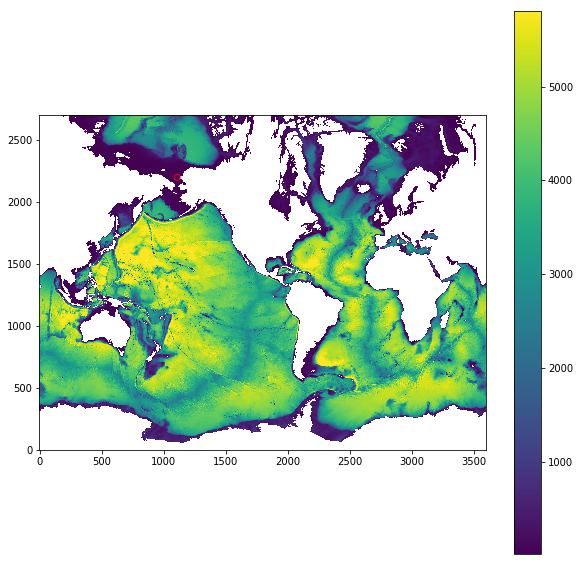

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(depth, origin='lower')
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='r');

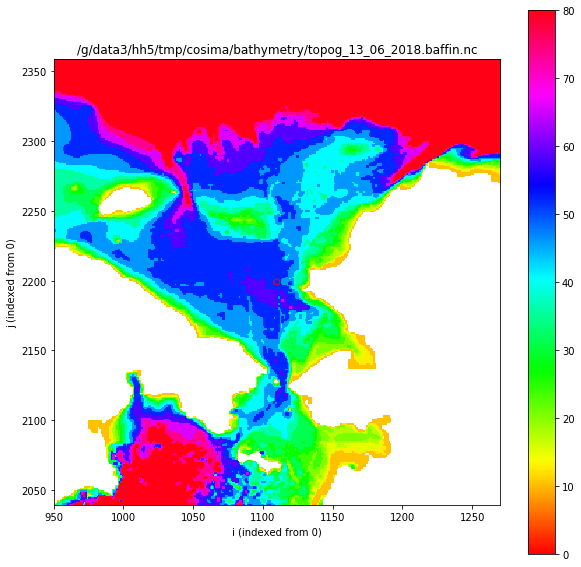

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(depth, vmin=0, vmax=80, origin='lower', cmap=plt.cm.hsv)
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='r')
plt.xlim(i-margin,i+margin)
plt.ylim(j-margin,j+margin)
plt.title(fixedbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

<Figure size 720x720 with 0 Axes>

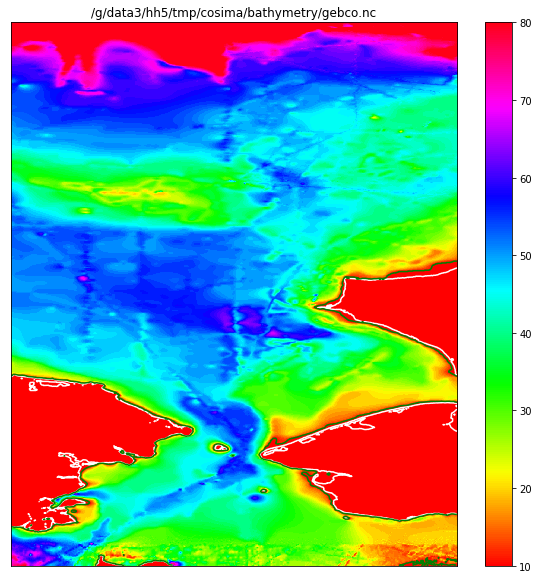

In [20]:
plt.figure(figsize=(10,10))
lonpt = lons[j,i]
latpt = lats[j,i]
gsub = gebco.sel(lon=slice(lonpt-5,lonpt+5),lat=slice(latpt-5,latpt+5))
plt.figure(figsize=(10,10))
plt.imshow(-gsub.variables['height'], vmin=10, vmax=80, origin='lower',aspect='auto', cmap=plt.cm.hsv)
plt.colorbar()
plt.contour(-gsub.variables['height'],[0],colors='w')
plt.contour(-gsub.variables['height'],[10],colors='g')
plt.title(gebcofile)
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([]);



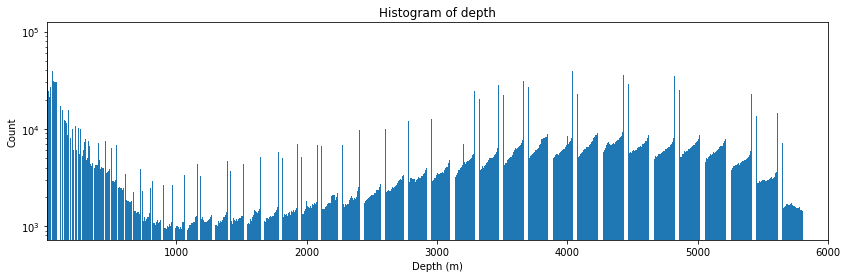

In [34]:
plt.figure(figsize=(14,4))
plt.hist(np.ma.ravel(depth), bins=1500, log=True);
plt.xlim(10, 6000)
plt.xlabel('Depth (m)')
plt.ylabel('Count');
plt.title('Histogram of depth');

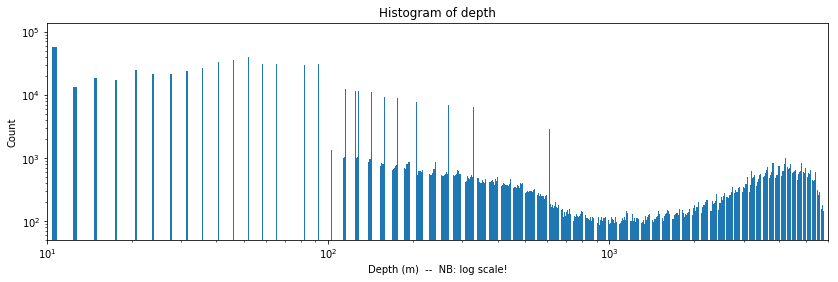

In [35]:
plt.figure(figsize=(14,4))
plt.hist(np.ma.ravel(depth), bins=15000, log=True);
plt.xlim(10, 6000)
plt.xscale('log')
plt.xlabel('Depth (m)  --  NB: log scale!')
plt.ylabel('Count');
plt.title('Histogram of depth');

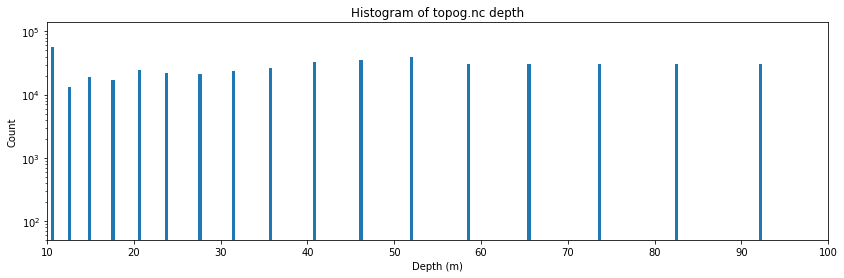

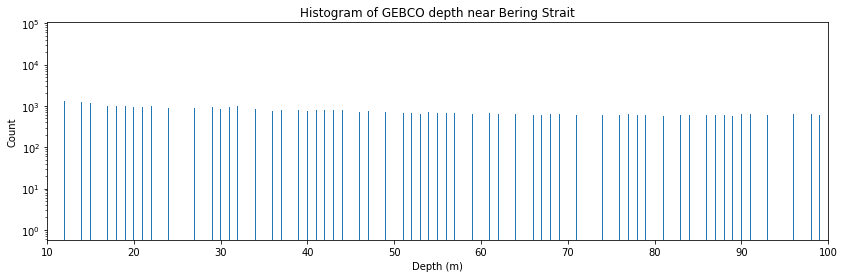

In [50]:
plt.figure(figsize=(14,4))
plt.hist(np.ma.ravel(depth), bins=15000, log=True);
plt.xlim(10, 100)
plt.xlabel('Depth (m)')
plt.ylabel('Count');
plt.title('Histogram of topog.nc depth');

plt.figure(figsize=(14,4))
plt.hist(np.ma.ravel(gsub['height']), bins=15000, log=True);
plt.xlim(10, 100)
plt.xlabel('Depth (m)')
plt.ylabel('Count');
plt.title('Histogram of GEBCO depth near Bering Strait');

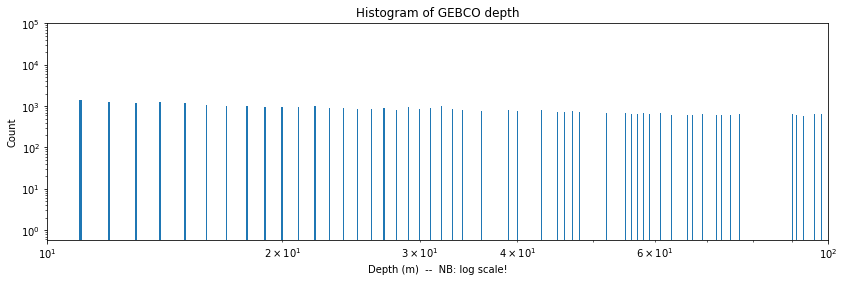

In [48]:
plt.figure(figsize=(14,4))
plt.hist(np.ma.ravel(gsub['height']), bins=15000, log=True);
plt.xlim(10, 100)
plt.xscale('log')
plt.xlabel('Depth (m)  --  NB: log scale!')
plt.ylabel('Count');
plt.title('Histogram of GEBCO depth');